In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.preprocessing import LabelEncoder

from numpy import array

import matplotlib.pyplot as plt

import time

In [2]:
Project Iris Predictors

In [3]:
tf.config.set_visible_devices ([], "GPU")

In [4]:
iris = pd.read_csv ("~/Desktop/Shuttle/Neural Networks/Data/iris.csv")
Species = iris.Species.unique ()

In [5]:
# Pre-process our continuous features.
#  1. Scale
#  2. Translate

data = iris
data = data.drop (columns = "Mono")

for u in data:
    if is_numeric_dtype (u):
        data[u] /= data[u].max ()             # 0 ≤ x ≤ 1
        data[u] -= data[u].mean ()            # -1 ≤ x ≤ 1, mean (data[u]) == 0.0

data.describe ()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset = data.values                      # Extract the values from the dataframe into an array
x = dataset[:, 0:4].astype(float)          # Split off our input features
Labels = dataset [:, 4]                    # Split off our species

In [7]:
# Hot-encode our species.  This is done as follows:
# 1. Discover all of the unique labels and assign them a unique integers.
#    The integers corrospond to indices in the hot-encoded vector.

# 2. Build a vector of integers corrosponding to their labels

# 3. Build an array of vectors where only the correct entry has a 1

Hot = LabelEncoder ()
Hot.fit (Labels)                      # Find the unique labels and assign indices (1)
HotLabels = Hot.transform (Labels)    # Build a vector of indices (2)

TrainingLabels = np_utils.to_categorical (HotLabels) # Finally, build the vectors (3)

In [8]:
# Project 

In [9]:
# TrainingLabels

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have prepared our data, now build the ANN</p>

In [10]:
model = Sequential()                                                 # Keras container for our model

model.add (Dense (20, input_dim=4, activation='sigmoid'))            # input vector of dim 4
model.add (Dense(20, activation='sigmoid'))                          # Second layer, 8 neurons
model.add (Dense (3, activation='softmax'))                          # Softmax layer

model.compile (loss='categorical_crossentropy', optimizer='adam')    # Build our ANN

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We have our training data, and our ANN, we can train the ANN now.</p>

In [11]:
start = time.time ()
h = model.fit (x, TrainingLabels, verbose=False, epochs = 5000)

dt = time.time () - start
print (dt)

2023-08-08 20:37:26.904028: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8.670699119567871


In [12]:
h.history["loss"][4999]

0.040610965341329575

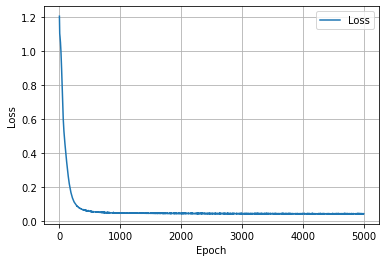

In [13]:
def LossHistory (history):
  plt.plot (history.history['loss'][0:4999], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

In [14]:
query = array([x[111, ]])  # How did we do?  Let's try one

In [15]:
# Simulate Softmax

def Inference (x):
    p0 = list (model.predict (query)[0])
    return Species[p0.index (max (p0))]

In [16]:
Inference (query) == iris.Species[111]

1/1 [==============================] - 0s 36ms/step


True

In [17]:
for i in range (0, 150):
    query = array ([x[i, ]])
    if Inference (query) != iris.Species[i]:
        print (i, Inference (query), iris.Species[i])


1/1 [==============================] - 0s 7ms/step
83 virginica versicolor
1/1 [==============================] - 0s 7ms/step
133 versicolor virginica
1/1 [==============================] - 0s 7ms/step


In [18]:
from tensorflow import keras
opt = keras.optimizers.Adam()
# dir (opt)

In [19]:
opt.get_config ()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}